### Training shallow network on CIFAR10

The code below implements a neural network witha hidden layer of size 4096 to classify CIFAR10. 

- Input layer = 32x32x3 = 3072
- Hidden layer size = 1024
- Output layer = 10 classes

In [11]:
from keras.models import Sequential, Model
from keras.utils import to_categorical 
from keras import optimizers 
from keras import layers 
from keras.datasets import cifar10 
import numpy as np 
from keras.engine import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import backend as K
import matplotlib.pyplot as plt

In [12]:
# Load Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Arrays to store training accuracy and loss
train_acc = []
train_loss = []
# Arrays to store test accuracy and loss
test_acc = []
test_loss = []
params = []
epochs = 25
n = 5

In [13]:
def make_model(num_hidden_layers, hidden_layer_size = 1024):
    model = Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32, 32, 3)))
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_layer_size, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    return model

Total number of trainable parameters has increased to 12,627,978 from 30,730 as result of adding a Dense/Fully connected hidden layer

In [14]:
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
sgd = optimizers.SGD(lr=0.001, decay=5e-5, momentum=0.9, nesterov=True)
for i in range(n):
    model =  make_model(i)
    #save parameters in the network
    params.append(int(np.sum([K.count_params(p) for p in set(model.trainable_weights)])))
    model.compile(optimizer=sgd, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, shuffle='batch', batch_size=64)
    train_loss.append(history.history['loss'][-1])
    train_acc.append(history.history['acc'][-1])
    loss, acc = model.evaluate(x_test, y_test)
    test_loss.append(loss)
    test_acc.append(acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.9446 - acc: 0.3144
Epoch 2/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.8258 - acc: 0.3647
Epoch 3/25
50000/50000 [==============================] - 3s 70us/step - loss: 1.7950 - acc: 0.3767
Epoch 4/25
50000/50000 [==============================] - 3s 65us/step - loss: 1.7768 - acc: 0.3848
Epoch 5/25
50000/50000 [==============================] - 3s 66us/step - loss: 1.7628 - acc: 0.3914
Epoch 6/25
50000/50000 [==========

50000/50000 [==============================] - 38s 767us/step - loss: 1.5876 - acc: 0.4505
Epoch 9/25
50000/50000 [==============================] - 39s 777us/step - loss: 1.5668 - acc: 0.4573
Epoch 10/25
50000/50000 [==============================] - 40s 801us/step - loss: 1.5475 - acc: 0.4637
Epoch 11/25
50000/50000 [==============================] - 39s 778us/step - loss: 1.5312 - acc: 0.4694
Epoch 12/25
50000/50000 [==============================] - 43s 850us/step - loss: 1.5138 - acc: 0.4738
Epoch 13/25
50000/50000 [==============================] - 40s 806us/step - loss: 1.4986 - acc: 0.4795
Epoch 14/25
50000/50000 [==============================] - 41s 812us/step - loss: 1.4839 - acc: 0.4848
Epoch 15/25
50000/50000 [==============================] - 41s 823us/step - loss: 1.4717 - acc: 0.4911
Epoch 16/25
50000/50000 [==============================] - 43s 863us/step - loss: 1.4592 - acc: 0.4937
Epoch 17/25
50000/50000 [==============================] - 40s 796us/step - loss: 1.44

50000/50000 [==============================] - 59s 1ms/step - loss: 1.4910 - acc: 0.4762
Epoch 17/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.4756 - acc: 0.4833
Epoch 18/25
50000/50000 [==============================] - 60s 1ms/step - loss: 1.4632 - acc: 0.4859
Epoch 19/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4506 - acc: 0.4908
Epoch 20/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4375 - acc: 0.4947
Epoch 21/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4244 - acc: 0.4996
Epoch 22/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.4123 - acc: 0.5051
Epoch 23/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.4008 - acc: 0.5073
Epoch 24/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.3894 - acc: 0.5126
Epoch 25/25
10000/10000 [==============================] - 4s 367us/step


In [15]:
print(params)
print(train_acc)
print(train_loss)
print(test_acc)
print(test_loss)

[30730, 3157002, 4206602, 5256202, 6305802]
[0.42358, 0.52518, 0.52954, 0.52116, 0.51412]
[1.688272847595215, 1.3854928829193116, 1.359546766204834, 1.3663580729675293, 1.377860910987854]
[0.3995, 0.491, 0.4966, 0.4957, 0.4872]
[1.724499193572998, 1.4513757482528686, 1.4248750221252442, 1.429769751548767, 1.4452525402069092]


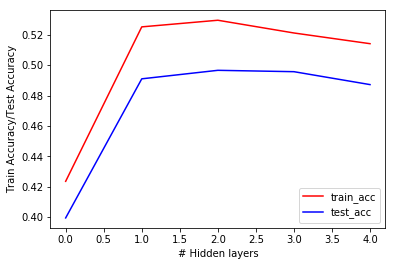

In [16]:
plt.figure()
plt.ylabel('Train Accuracy/Test Accuracy')
plt.xlabel('# Hidden layers')
plt.plot(range(n), train_acc, 'r')
plt.plot(range(n), test_acc, 'b')
plt.legend(['train_acc','test_acc'])

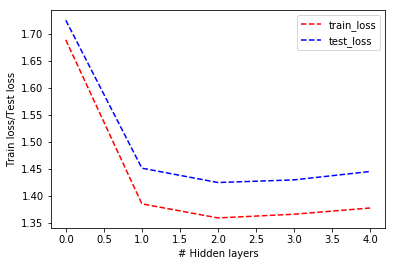

In [17]:
plt.figure()
plt.ylabel('Train loss/Test loss')
plt.xlabel('# Hidden layers')
plt.plot(range(n), train_loss, 'r--')
plt.plot(range(n), test_loss, 'b--')
plt.legend(['train_loss','test_loss'])

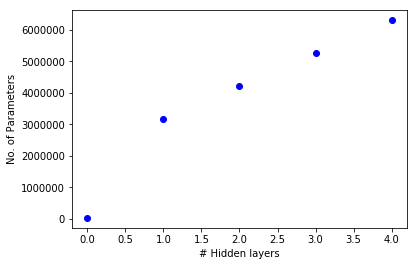

In [18]:
plt.figure()
plt.ylabel('No. of Parameters')
plt.xlabel('# Hidden layers')
plt.plot(range(n), params, 'bo')

In [19]:
print(params)

[30730, 3157002, 4206602, 5256202, 6305802]
